In [57]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = ['^HSI', '9988.HK']

# Fetch historical data for each ticker
df = pd.DataFrame()

# Fetch historical data for each ticker and add it to the DataFrame
for ticker in tickers:
    data = yf.Ticker(ticker).history(period='5y')['Close']
    df[ticker] = data

df = df.dropna()
df.columns = ['HSI', 'Alibaba']

In [3]:
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()

<ipython-input-3-c045eeb954a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]  / df[column].abs().max()


In [4]:
np.cov(df['HSI'],df['Alibaba'])[0][1] / np.var(df['HSI'])

1.489493112187388

In [56]:
beta = df.cov().iloc[0,1] / df['HSI'].var()
print(f"Beta: {beta:.2f}")

Beta: 1.49


(array([18261.66666667, 18443.66666667, 18627.66666667, 18808.66666667,
        18992.66666667, 19173.66666667, 19357.66666667, 19538.66666667,
        19722.66666667]),
 [Text(18261.666666666668, 0, '2020-01'),
  Text(18443.666666666668, 0, '2020-07'),
  Text(18627.666666666668, 0, '2021-01'),
  Text(18808.666666666668, 0, '2021-07'),
  Text(18992.666666666668, 0, '2022-01'),
  Text(19173.666666666668, 0, '2022-07'),
  Text(19357.666666666668, 0, '2023-01'),
  Text(19538.666666666668, 0, '2023-07'),
  Text(19722.666666666668, 0, '2024-01')])

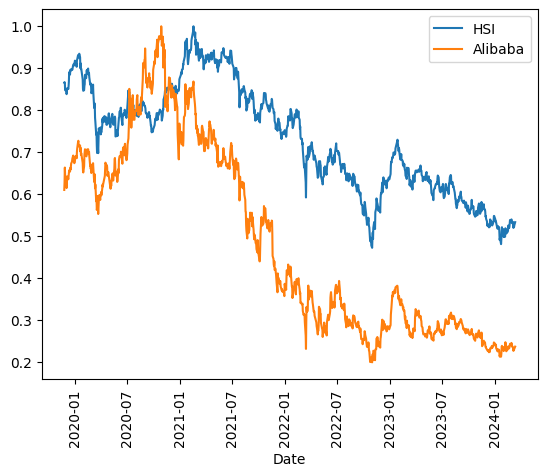

In [11]:
sns.lineplot(df, dashes = False)
plt.xticks(rotation = 90)

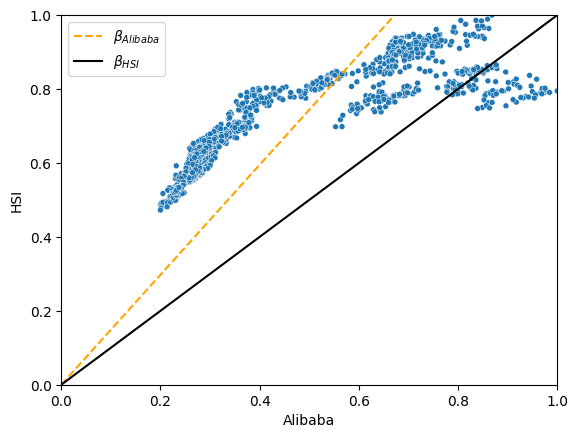

In [29]:
sns.scatterplot(df, x = 'Alibaba', y = 'HSI', size = 0.05, legend = False)
plt.axline((0,0), slope=beta, c = 'orange', ls = '--', label = '$\\beta_{Alibaba}$')
plt.axline((0,0), slope=1, c = 'black', label = '$\\beta_{HSI}$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()

In [59]:
MRP = 4.6/100
RF = 1.03/100
CAPM = RF + beta*(MRP)
print(f'CAPM: {CAPM * 100:.2f}')

CAPM: 7.88
